In [1]:
# %display latex

In [2]:
from IPython.display import display, Math, Latex

In [3]:
kappa = var("kappa")

z = var("z")
rh = var("rho")
ph = var("varphi")

c = var("c")
omega = var("omega")

h = var("h")
a = var("a")

m = var("m")
psi_m = var("psi_m")

m_val = 0
a_val = 12

In [4]:
def bessel_J_diff(m, arg):
    return bessel_J(m, x).diff(x).subs(x == arg)

In [5]:
exec(preparse("bessel_J_d = lambda m, x: " + str(bessel_J(m,x).diff(x)) +""))

In [6]:
n_layers = 2

In [7]:
mu = []
for i in range(n_layers):
    exec("mu_" + str(i) + "= var('mu_" + str(i) + "')")
    exec("mu += [mu_" + str(i) +"]")

In [8]:
epsilon = []
for i in range(n_layers):
    exec("epsilon_" + str(i) + "= var('epsilon_" + str(i) + "')")
    exec("epsilon += [epsilon_" + str(i) +"]")

In [9]:
A_z = []
for i in range(n_layers):
    exec("A_z_" + str(i) + "= var('A_z_" + str(i) + "')")
    exec("A_z += [A_z_" + str(i) +"]")

In [10]:
A_z

[A_z_0, A_z_1]

In [11]:
B_z = []
for i in range(n_layers):
    exec("B_z_" + str(i) + "= var('B_z_" + str(i) + "')")
    exec("B_z += [B_z_" + str(i) +"]")

In [12]:
B_z

[B_z_0, B_z_1]

In [13]:
k = []
for i in range(n_layers):
    exec("k_" + str(i) + "= var('k_" + str(i) + "')")
    exec("k += [k_" + str(i) +"]")

$rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}\,\vec{H}$

$rot\,\vec{H} = - \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} \vec{E}$



$rot\,rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}rot\,\vec{H}$

$rot\,rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}\left(- \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} \vec{E}\right)$

$rot\,rot\,\vec{E} = \mu\,\frac{\omega^2}{c^2} \epsilon_{\alpha\,\beta} \vec{E}$


$rot\,rot\,\vec{H} = - \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} rot\, \vec{E}$

$rot\,rot\,\vec{H} = - \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} \mu\,\frac{i\,\omega}{c}\,\vec{H}$

$rot\,rot\,\vec{H} = \mu\,\frac{\omega^2}{c^2} \epsilon_{\alpha\,\beta}\,\vec{H}$



$rot\,rot\,\vec{E} = grad\,div\,\vec{E} - Laplasian\,\vec{E}$

$Laplasian\,\vec{E} + \mu\frac{\omega^2}{c^2}\,\epsilon_{\alpha\,\beta}\vec{E} - grad\,div\,\vec{E} = 0$

In [14]:
# исходя из вида дифференциальных уравнений для диэлектрика
# записываем соотнощения для волнового вектора в виде уравнений
eq_kappa = []
for i in range(n_layers):
    eq_kappa += [mu[i] * epsilon[i] * omega^2 / c^2 - k[i]^2 == kappa^2]

display(Math(latex(eq_kappa)))

<IPython.core.display.Math object>

In [15]:
E_rh = []
for i in range(n_layers):
    E_rh += [lambda rh,ph,z, i=i: k[i]/kappa * bessel_J_d(m,kappa*rh)*(-A_z[i]*sin(k[i]*z) + B_z[i]*cos(k[i]*z)) * sin(m*ph + psi_m)]

In [16]:
E_ph = []
for i in range(n_layers):
    E_ph += [lambda rh,ph,z, i=i: m*k[i]/(kappa^2*rh) * bessel_J  (m,kappa*rh)*(-A_z[i]*sin(k[i]*z) + B_z[i]*cos(k[i]*z)) * cos(m*ph + psi_m)]

In [17]:
E_z = []
for i in range(n_layers):
    E_z += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*( A_z[i]*cos(k[i]*z) + B_z[i]*sin(k[i]*z)) * sin(m*ph + psi_m)]

In [18]:
H_rh = []
for i in range(n_layers):
    H_rh += [lambda rh,ph,z, i=i : I*m*omega*epsilon[i]/(kappa^2*c*rh) * bessel_J  (m,kappa*rh)*(-A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z)) * cos(m*ph + psi_m)]

In [19]:
H_ph = []
for i in range(n_layers):
    H_ph += [lambda rh,ph,z, i=i : I*omega*epsilon[i]/(kappa*c) * bessel_J_d(m,kappa*rh)*( A_z[i]*cos(k[i]*z) + B_z[i]*sin(k[i]*z)) * sin(m*ph + psi_m)]

In [20]:
H_z = []
for i in range(n_layers):
    H_z += [lambda rh,ph,z, i=i : 0]

In [21]:
E_rh[0](rh,ph,z)

-1/2*(B_z_0*cos(k_0*z) - A_z_0*sin(k_0*z))*k_0*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi + psi_m)/kappa

In [22]:
E_ph[0](rh,ph,z)

(B_z_0*cos(k_0*z) - A_z_0*sin(k_0*z))*k_0*m*bessel_J(m, kappa*rho)*cos(m*varphi + psi_m)/(kappa^2*rho)

In [23]:
if 1 < n_layers:
    E_rh[1](rh,ph,z)

In [24]:
if 1 < n_layers:
    E_ph[1](rh,ph,z)

In [25]:
E_z[0](rh,ph,z)

(A_z_0*cos(k_0*z) + B_z_0*sin(k_0*z))*bessel_J(m, kappa*rho)*sin(m*varphi + psi_m)

In [26]:
if 1 < n_layers:
    E_z[1](rh,ph,z)

In [27]:
ES.<rho,phi,zz> = EuclideanSpace(coordinates='cylindrical')

In [28]:
i = 0
E0 = ES.vector_field(
    E_rh[i](rho,phi,zz),
    E_ph[i](rho,phi,zz),
    E_z[i](rho,phi,zz),
    name='E0')

In [29]:
H0 = ES.vector_field(
    H_rh[i](rho,phi,zz),
    H_ph[i](rho,phi,zz),
    H_z[i](rho,phi,zz),
    name='H0')

In [30]:
from sage.manifolds.operators import *
rot_rot_E0 = curl(curl(E0))
rot_rot_H0 = curl(curl(H0))

rot_rot_E0.display()

curl(curl(E0)) = -1/2*((((B_z_0*k_0^3 + B_z_0*k_0*kappa^2)*bessel_J(m + 1, kappa*rho) - (B_z_0*k_0^3 + B_z_0*k_0*kappa^2)*bessel_J(m - 1, kappa*rho))*cos(psi_m)*sin(m*phi) + ((B_z_0*k_0^3 + B_z_0*k_0*kappa^2)*bessel_J(m + 1, kappa*rho) - (B_z_0*k_0^3 + B_z_0*k_0*kappa^2)*bessel_J(m - 1, kappa*rho))*cos(m*phi)*sin(psi_m))*cos(k_0*zz) - (((A_z_0*k_0^3 + A_z_0*k_0*kappa^2)*bessel_J(m + 1, kappa*rho) - (A_z_0*k_0^3 + A_z_0*k_0*kappa^2)*bessel_J(m - 1, kappa*rho))*cos(psi_m)*sin(m*phi) + ((A_z_0*k_0^3 + A_z_0*k_0*kappa^2)*bessel_J(m + 1, kappa*rho) - (A_z_0*k_0^3 + A_z_0*k_0*kappa^2)*bessel_J(m - 1, kappa*rho))*cos(m*phi)*sin(psi_m))*sin(k_0*zz))/kappa e_rho + (((B_z_0*k_0^3 + B_z_0*k_0*kappa^2)*m*bessel_J(m, kappa*rho)*cos(m*phi)*cos(psi_m) - (B_z_0*k_0^3 + B_z_0*k_0*kappa^2)*m*bessel_J(m, kappa*rho)*sin(m*phi)*sin(psi_m))*cos(k_0*zz) - ((A_z_0*k_0^3 + A_z_0*k_0*kappa^2)*m*bessel_J(m, kappa*rho)*cos(m*phi)*cos(psi_m) - (A_z_0*k_0^3 + A_z_0*k_0*kappa^2)*m*bessel_J(m, kappa*rho)*sin(m*phi)*s

In [31]:
mu_epsilon_omega2_c2_E0 = mu[i] * epsilon[i] * (omega^2 / c^2) * E0
mu_epsilon_omega2_c2_H0 = mu[i] * epsilon[i] * (omega^2 / c^2) * H0

mu_epsilon_omega2_c2_E0.display()

-1/2*(((B_z_0*epsilon_0*k_0*bessel_J(m + 1, kappa*rho) - B_z_0*epsilon_0*k_0*bessel_J(m - 1, kappa*rho))*mu_0*omega^2*cos(psi_m)*sin(m*phi) + (B_z_0*epsilon_0*k_0*bessel_J(m + 1, kappa*rho) - B_z_0*epsilon_0*k_0*bessel_J(m - 1, kappa*rho))*mu_0*omega^2*cos(m*phi)*sin(psi_m))*cos(k_0*zz) - ((A_z_0*epsilon_0*k_0*bessel_J(m + 1, kappa*rho) - A_z_0*epsilon_0*k_0*bessel_J(m - 1, kappa*rho))*mu_0*omega^2*cos(psi_m)*sin(m*phi) + (A_z_0*epsilon_0*k_0*bessel_J(m + 1, kappa*rho) - A_z_0*epsilon_0*k_0*bessel_J(m - 1, kappa*rho))*mu_0*omega^2*cos(m*phi)*sin(psi_m))*sin(k_0*zz))/(c^2*kappa) e_rho + ((B_z_0*epsilon_0*k_0*m*mu_0*omega^2*bessel_J(m, kappa*rho)*cos(m*phi)*cos(psi_m) - B_z_0*epsilon_0*k_0*m*mu_0*omega^2*bessel_J(m, kappa*rho)*sin(m*phi)*sin(psi_m))*cos(k_0*zz) - (A_z_0*epsilon_0*k_0*m*mu_0*omega^2*bessel_J(m, kappa*rho)*cos(m*phi)*cos(psi_m) - A_z_0*epsilon_0*k_0*m*mu_0*omega^2*bessel_J(m, kappa*rho)*sin(m*phi)*sin(psi_m))*sin(k_0*zz))/(c^2*kappa^2*rho) e_phi + ((A_z_0*epsilon_0*mu_0*om

In [32]:
eq_rot_rot_E = []
eq_rot_rot_H = []
for j in ES.irange():
    eq_rot_rot_E += [(rot_rot_E0[j].expr() - mu_epsilon_omega2_c2_E0[j].expr()).subs(solve(eq_kappa[i], omega^2)).full_simplify().factor() == 0]
    eq_rot_rot_H += [(rot_rot_H0[j].expr() - mu_epsilon_omega2_c2_H0[j].expr()).subs(solve(eq_kappa[i], omega^2)).full_simplify().factor() == 0]

In [33]:
eq_rot_rot_E

[0 == 0,
 0 == 0,
 -1/4*(kappa^2*rho^2*bessel_J(m + 2, kappa*rho) + kappa^2*rho^2*bessel_J(m - 2, kappa*rho) + 2*kappa^2*rho^2*bessel_J(m, kappa*rho) - 2*kappa*rho*bessel_J(m + 1, kappa*rho) + 2*kappa*rho*bessel_J(m - 1, kappa*rho) - 4*m^2*bessel_J(m, kappa*rho))*(k_0^2 + kappa^2)*(A_z_0*cos(k_0*zz) + B_z_0*sin(k_0*zz))*(cos(psi_m)*sin(m*phi) + cos(m*phi)*sin(psi_m))/(kappa^2*rho^2) == 0]

In [34]:
display(Math(latex(eq_rot_rot_H)))

<IPython.core.display.Math object>

In [338]:
eq_eq_rot_rot_Ez = (eq_rot_rot_E[2])
display(Math(latex(eq_eq_rot_rot_Ez)))

<IPython.core.display.Math object>

In [339]:
display(Math(latex(eq_eq_rot_rot_Ez.lhs().numerator().operands()[0])))

<IPython.core.display.Math object>

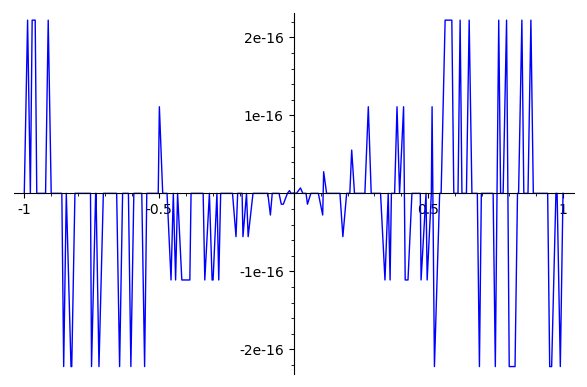

In [340]:
plot(eq_eq_rot_rot_Ez.lhs().numerator().operands()[0].subs(kappa==1, m == 1, psi_m == pi/2), rh)

In [38]:
rotE_rh = []
for i in range(n_layers):
    exec(preparse("rotE_rh += [lambda rh,ph,z, i=i: " + str(E_z[i](rh,ph,z).diff(ph)/rh - E_ph[i](rh,ph,z).diff(z)) +"]"))

In [39]:
rotE_ph = []
for i in range(n_layers):
    exec(preparse("rotE_ph += [lambda rh,ph,z, i=i: " + str(E_rh[i](rh,ph,z).diff(z)-E_z[i](rh,ph,z).diff(rh)) +"]"))

In [40]:
rotE_z = []
for i in range(n_layers):
    exec(preparse("rotE_z += [lambda rh,ph,z, i=i: " + str(((rh*E_ph[i](rh,ph,z)).diff(rh) - E_rh[i](rh,ph,z).diff(ph))/rh) +"]"))

In [41]:
rotE_ph[0](rh,ph,z)

1/2*(A_z_0*cos(k_0*z) + B_z_0*sin(k_0*z))*kappa*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi + psi_m) + 1/2*(A_z_0*k_0*cos(k_0*z) + B_z_0*k_0*sin(k_0*z))*k_0*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi + psi_m)/kappa

In [42]:
if 1 < n_layers:
    rotE_ph[1](rh,ph,z)

In [43]:
rotE_rh[0](rh,ph,z)

(A_z_0*cos(k_0*z) + B_z_0*sin(k_0*z))*m*bessel_J(m, kappa*rho)*cos(m*varphi + psi_m)/rho + (A_z_0*k_0*cos(k_0*z) + B_z_0*k_0*sin(k_0*z))*k_0*m*bessel_J(m, kappa*rho)*cos(m*varphi + psi_m)/(kappa^2*rho)

In [44]:
rotE_z[0](rh,ph,z)

0

In [45]:
H_rh = []
for i in range(n_layers):
    H_rh += [lambda rh,ph,z, i=i : rotE_rh[i](rh,ph,z)*c/(I*omega *mu[i])]

In [46]:
H_ph = []
for i in range(n_layers):
    H_ph += [lambda rh,ph,z, i=i : rotE_ph[i](rh,ph,z)*c/(I*omega *mu[i])]

In [47]:
H_z = []
for i in range(n_layers):
    H_z += [lambda rh,ph,z, i=i : rotE_z[i](rh,ph,z)*c/(I*omega *mu[i])]

In [48]:
H_rh[0](rh,ph,z).factor()

-I*(k_0^2 + kappa^2)*(A_z_0*cos(k_0*z) + B_z_0*sin(k_0*z))*c*m*bessel_J(m, kappa*rho)*cos(m*varphi + psi_m)/(kappa^2*mu_0*omega*rho)

In [49]:
if 1 < n_layers:
    H_rh[1](rh,ph,z)

In [50]:
display(Math(latex(H_ph[0](rh,ph,z).factor())))

<IPython.core.display.Math object>

In [51]:
H_ph[0](rh,ph,z).subs(m == 0, B_z[0] == 0)

-1/2*I*(A_z_0*k_0^2*(bessel_J(1, kappa*rho) - bessel_J(-1, kappa*rho))*cos(k_0*z)*sin(psi_m)/kappa + A_z_0*kappa*(bessel_J(1, kappa*rho) - bessel_J(-1, kappa*rho))*cos(k_0*z)*sin(psi_m))*c/(mu_0*omega)

In [52]:
if 1 < n_layers:
    H_ph[1](rh,ph,z)

In [53]:
H_z[0](rh,ph,z)

0

In [54]:
if 1 < n_layers:
    H_z[1](rh,ph,z)

In [55]:
# граничные условия
# тангенциальная компонента электрического поля
eq_Erh_superconductor_boundary_conditions = []
eq_Erh_superconductor_boundary_conditions += [E_rh[0](rh,ph,0) == 0.0]
eq_Erh_superconductor_boundary_conditions += [E_rh[n_layers - 1](rh,ph,h*n_layers) == 0.0]

eq_Eph_superconductor_boundary_conditions = []
eq_Eph_superconductor_boundary_conditions += [E_ph[0](rh,ph,0) == 0.0]
eq_Eph_superconductor_boundary_conditions += [E_ph[n_layers - 1](rh,ph,h*n_layers) == 0.0]

display(Math(latex(eq_Erh_superconductor_boundary_conditions)))
display(Math(latex(eq_Eph_superconductor_boundary_conditions)))

boundary_Erh_subs_begin = solve(eq_Erh_superconductor_boundary_conditions[0], B_z[0])
boundary_Erh_subs_end = solve(eq_Erh_superconductor_boundary_conditions[1], B_z[n_layers - 1])

boundary_Eph_subs_begin = solve(eq_Eph_superconductor_boundary_conditions[0], B_z[0])
boundary_Eph_subs_end = solve(eq_Eph_superconductor_boundary_conditions[1], B_z[n_layers - 1])

display(Math(latex(boundary_Erh_subs_begin)))
display(Math(latex(boundary_Erh_subs_end)))

display(Math(latex(boundary_Eph_subs_begin)))
display(Math(latex(boundary_Eph_subs_end)))

boundary_conductor = boundary_Erh_subs_begin + boundary_Erh_subs_end
#boundary_conductor += boundary_Eph_subs_begin + boundary_Eph_subs_end
display(Math(latex(boundary_conductor)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [56]:
E_rho = []
for i in range(n_layers):
    exec(preparse("E_rho += [ lambda rh, ph, z, i=i : " + str(E_rh[i](rh,ph,z).subs(boundary_conductor)) +"]"))

In [57]:
E_phi = []
for i in range(n_layers):
    exec(preparse("E_phi += [ lambda rh, ph, z, i=i : " + str(E_ph[i](rh,ph,z).subs(boundary_conductor)) +"]"))

In [58]:
E_zz = []
for i in range(n_layers):
    exec(preparse("E_zz += [ lambda rh, ph, z, i=i : " + str(E_z[i](rh,ph,z).subs(boundary_conductor)) +"]"))

In [59]:
H_rho = []
for i in range(n_layers):
    exec(preparse("H_rho += [ lambda rh, ph, z, i=i : " + str(H_rh[i](rh,ph,z).subs(boundary_conductor)) +"]"))

In [60]:
H_phi = []
for i in range(n_layers):
    exec(preparse("H_phi += [ lambda rh, ph, z, i=i : " + str(H_ph[i](rh,ph,z).subs(boundary_conductor)) +"]"))

In [61]:
H_zz = []
for i in range(n_layers):
    exec(preparse("H_zz += [ lambda rh, ph, z, i=i : " + str(H_z[i](rh,ph,z).subs(boundary_conductor)) +"]"))

In [62]:
if 0 < n_layers:
    display(Math(latex(E_rh[0](rh,ph,z))))
    display(Math(latex(E_rho[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [63]:
if 1 < n_layers:
    display(Math(latex(E_rh[1](rh,ph,z))))
    display(Math(latex(E_rho[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [64]:
if 0 < n_layers:
    display(Math(latex(E_z[0](rh,ph,z))))
    display(Math(latex(E_zz[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [65]:
if 1 < n_layers:
    display(Math(latex(E_z[1](rh,ph,z))))
    display(Math(latex(E_zz[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [66]:
if 0 < n_layers:
    display(Math(latex(H_rh[0](rh,ph,z))))
    display(Math(latex(H_rho[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [67]:
if 1 < n_layers:
    display(Math(latex(H_rh[1](rh,ph,z))))
    display(Math(latex(H_rho[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [68]:
if 0 < n_layers:
    display(Math(latex(H_ph[0](rh,ph,z))))
    display(Math(latex(H_phi[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [69]:
if 1 < n_layers:
    display(Math(latex(H_ph[1](rh,ph,z))))
    display(Math(latex(H_phi[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [70]:
if 1 < n_layers:
    display(Math(latex(H_zz[1](rh,ph,z))))

<IPython.core.display.Math object>

In [71]:
def GenerateMatrix(equsys, vars):
    A=matrix(SR, [[(equ.lhs() - equ.rhs()).coefficient(v) for v in vars] for equ in equsys])
    return A

In [72]:
all_vars = []
for i in range(n_layers):
    all_vars += [A_z[i], B_z[i]]
    
all_vars

[A_z_0, B_z_0, A_z_1, B_z_1]

In [73]:
def reduceDependedRows(M):
    print ("")
    print ("M.nrows()", M.nrows())
    print ("M.ncols()", M.ncols())
    print ("M.rank()", M.rank())

    M_pivot_rows = M.pivot_rows()
    print ("M.pivot_rows() =", M_pivot_rows)

    M_rows = M.rows()
    #for row in M_rows:
    #    print("row =")
    #    display(Math(latex(row)))

    reduced_list = []
    for r in M_pivot_rows:
        #print ("M_rows[", r, "] =")
        #display(Math(latex(M_rows[r])))
        reduced_list.append(M_rows[r])

    reduced_M = matrix(SR, len(M_pivot_rows), M.ncols(), reduced_list)
    #if reduced_M.nrows() == reduced_M.ncols():
        #reduced_M_det = reduced_M.det()
        #print ("")
        #print ("reduced_M.det() =")
        #display(Math(latex(reduced_M_det)))
    return reduced_M

In [74]:
def make_eqsys_from_reduced_M(M_rotH, vars):
    xx = vector(SR, vars)
    # print("eqns =")
    eqns = [(M_rotH*xx)[index] == 0 for index in range(M_rotH.nrows())]
    # display(Math(latex(eqns)))
    return (eqns)

In [75]:
bch = []
bc =  []
for i  in range (n_layers-1):
    bc += [(E_rho[i](rh,ph, (i + 1) * h) == E_rho[i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]
    bc += [(E_phi[i](rh,ph, (i + 1) * h) == E_phi[i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]
    bc += [(epsilon[i] * E_z[i](rh,ph,(i+1)*h) == epsilon[i+1]*E_z[i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]

    bch += [(H_phi [i](rh,ph,(i+1)*h) == H_phi [i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]

In [76]:
display(Math(latex(bc)))

<IPython.core.display.Math object>

In [77]:
bch

[-1/2*(I*A_z_0*k_0^2*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(h*k_0)*sin(m*varphi + psi_m)/kappa + I*A_z_0*kappa*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(h*k_0)*sin(m*varphi + psi_m))*c/(mu_0*omega) == -1/2*(I*(A_z_1*cos(h*k_1) + A_z_1*sin(2*h*k_1)*sin(h*k_1)/cos(2*h*k_1))*kappa*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi + psi_m) + I*(A_z_1*k_1*cos(h*k_1) + A_z_1*k_1*sin(2*h*k_1)*sin(h*k_1)/cos(2*h*k_1))*k_1*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi + psi_m)/kappa)*c/(mu_1*omega)]

In [78]:
all_eqs = bc \
        + boundary_conductor

#display(Math(latex(all_eqs)))

In [79]:
M = GenerateMatrix(all_eqs, all_vars)

In [80]:
display(Math(latex(M)))

<IPython.core.display.Math object>

In [81]:
M.nrows(), M.ncols(), len(all_vars)

(5, 4, 4)

In [82]:
M.rank()

4

In [83]:
reduced_M = reduceDependedRows(M)


M.nrows() 5
M.ncols() 4
M.rank() 4
M.pivot_rows() = (0, 2, 3, 4)


In [84]:
reduced_M.nrows(), reduced_M.ncols(),

(4, 4)

In [85]:
reduced_M.pivots()

(0, 1, 2, 3)

In [86]:
def reduceEmptyCols(M, vars):
    print ("")
    print ("M.nrows()", M.nrows())
    print ("M.ncols()", M.ncols())
    print ("M.rank()", M.rank())
    print ("len(vars)", len(vars))

    M_pivots = M.pivots()
    print ("M.pivots() =", M_pivots)
    
    M_transposed = M.transpose()

    M_cols = M_transposed.rows()
    #for col in M_cols:
    #    print("col =")
    #    display(Math(latex(col)))

    reduced_list = []
    reduced_vars = []
    for c in M_pivots:
        #print ("M_cols[", c, "] =")
        #display(Math(latex(M_cols[c])))
        reduced_list.append(M_cols[c])
        reduced_vars.append(vars[c])

    reduced_M_transposed = matrix(SR, len(M_pivots), M.nrows(), reduced_list)
    return reduced_vars, reduced_M_transposed.transpose()

In [87]:
reduced_vars, reduced_reduced_M = reduceEmptyCols(reduced_M, all_vars)


M.nrows() 4
M.ncols() 4
M.rank() 4
len(vars) 4
M.pivots() = (0, 1, 2, 3)


In [88]:
reduced_reduced_M.nrows(), reduced_reduced_M.ncols(), len(reduced_vars)

(4, 4, 4)

In [89]:
reduced_vars

[A_z_0, B_z_0, A_z_1, B_z_1]

In [90]:
display(Math(latex(reduced_reduced_M)))

<IPython.core.display.Math object>

In [91]:
reduced_reduced_M_det = reduced_reduced_M.det()

In [92]:
reduced_reduced_M_det

1/2*epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_1)*sin(h*k_0)*sin(m*varphi + psi_m)^2/kappa - 1/2*epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_1)*sin(h*k_0)*sin(m*varphi + psi_m)^2/kappa + 1/2*epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1)*sin(m*varphi + psi_m)^2/(kappa*cos(2*h*k_1)) - 1/2*epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1)*sin(m*varphi + psi_m)^2/(kappa*cos(2*h*k_1)) - 1/2*epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*sin(h*k_1)*sin(m*varphi + psi_m)^2/kappa + 1/2*epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*sin(h*k_1)*sin(m*varphi + psi_m)^2/kappa + 1/2*epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1)*sin(m*varphi + psi_m)^2/(kappa*cos(2*h*k_1)) - 1/2*epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa

In [93]:
M_det  = reduced_reduced_M_det

In [94]:
M_det

1/2*epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_1)*sin(h*k_0)*sin(m*varphi + psi_m)^2/kappa - 1/2*epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_1)*sin(h*k_0)*sin(m*varphi + psi_m)^2/kappa + 1/2*epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1)*sin(m*varphi + psi_m)^2/(kappa*cos(2*h*k_1)) - 1/2*epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1)*sin(m*varphi + psi_m)^2/(kappa*cos(2*h*k_1)) - 1/2*epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*sin(h*k_1)*sin(m*varphi + psi_m)^2/kappa + 1/2*epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*sin(h*k_1)*sin(m*varphi + psi_m)^2/kappa + 1/2*epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1)*sin(m*varphi + psi_m)^2/(kappa*cos(2*h*k_1)) - 1/2*epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa

In [95]:
# display(Math(latex(M_det)))

In [96]:
M_det_num = M_det.numerator()

In [97]:
M_det_num

epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(2*h*k_1)*cos(h*k_1)*sin(h*k_0)*sin(m*varphi + psi_m)^2 - epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(2*h*k_1)*cos(h*k_1)*sin(h*k_0)*sin(m*varphi + psi_m)^2 + epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1)*sin(m*varphi + psi_m)^2 - epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1)*sin(m*varphi + psi_m)^2 - epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(2*h*k_1)*sin(h*k_1)*sin(m*varphi + psi_m)^2 + epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(2*h*k_1)*sin(h*k_1)*sin(m*varphi + psi_m)^2 + epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1)*sin(m*varphi + psi_m)^2 - epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1)*sin(m*varphi + psi_m)^2

In [98]:
M_det_num.variables()

(epsilon_0, epsilon_1, h, k_0, k_1, kappa, m, psi_m, rho, varphi)

In [99]:
M_det.full_simplify().numerator()

-epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_1)*cos(psi_m)^2*sin(h*k_0)*sin(m*varphi)^2 + epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_1)*cos(psi_m)^2*sin(h*k_0)*sin(m*varphi)^2 - epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(psi_m)^2*sin(h*k_1)*sin(m*varphi)^2 + epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(psi_m)^2*sin(h*k_1)*sin(m*varphi)^2 - 2*epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_1)*cos(m*varphi)*cos(psi_m)*sin(h*k_0)*sin(m*varphi)*sin(psi_m) + 2*epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_1)*cos(m*varphi)*cos(psi_m)*sin(h*k_0)*sin(m*varphi)*sin(psi_m) - 2*epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(m*varphi)*cos(psi_m)*sin(h*k_1)*sin(m*varphi)*sin(psi_m) + 2*epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(m*varphi)*cos(psi_m)*sin(h*k_1

In [100]:
M_det_num_expand = M_det_num.expand()

In [101]:
M_det_num_expand.operator()

<function add_vararg at 0x7fa53503ef80>

In [102]:
for operand in M_det_num_expand.operands():
    print (operand)
    print ("")

epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(2*h*k_1)*cos(h*k_1)*sin(h*k_0)*sin(m*varphi + psi_m)^2

-epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(2*h*k_1)*cos(h*k_1)*sin(h*k_0)*sin(m*varphi + psi_m)^2

epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1)*sin(m*varphi + psi_m)^2

-epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1)*sin(m*varphi + psi_m)^2

-epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(2*h*k_1)*sin(h*k_1)*sin(m*varphi + psi_m)^2

epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(2*h*k_1)*sin(h*k_1)*sin(m*varphi + psi_m)^2

epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1)*sin(m*varphi + psi_m)^2

-epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1)*sin(m*varphi + psi_m)^2



for md in [0,1]:
    M_det_num = (M_det_num/bessel_J(md,kappa * rh)).full_simplify().expand()

In [103]:
M_det_num

epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(2*h*k_1)*cos(h*k_1)*sin(h*k_0)*sin(m*varphi + psi_m)^2 - epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(2*h*k_1)*cos(h*k_1)*sin(h*k_0)*sin(m*varphi + psi_m)^2 + epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1)*sin(m*varphi + psi_m)^2 - epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1)*sin(m*varphi + psi_m)^2 - epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(2*h*k_1)*sin(h*k_1)*sin(m*varphi + psi_m)^2 + epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(2*h*k_1)*sin(h*k_1)*sin(m*varphi + psi_m)^2 + epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1)*sin(m*varphi + psi_m)^2 - epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1)*sin(m*varphi + psi_m)^2

In [104]:
M_det_num_factor = M_det_num.factor()

In [105]:
M_det_num_factor.operator()

<function mul_vararg at 0x7fa53398bc20>

In [106]:
M_det_num_factor.operands()

[epsilon_1*k_0*cos(2*h*k_1)*cos(h*k_1)*sin(h*k_0) + epsilon_0*k_1*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1) - epsilon_0*k_1*cos(h*k_0)*cos(2*h*k_1)*sin(h*k_1) + epsilon_1*k_0*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1),
 bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho),
 bessel_J(m, kappa*rho),
 sin(m*varphi + psi_m)^2]

In [107]:
M_det_num_factor_operands = ()
for operand in M_det_num_factor.operands():
    print (operand)
    print (operand.variables())
    if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
        M_det_num_factor_operands += (operand,)
    print ("")

epsilon_1*k_0*cos(2*h*k_1)*cos(h*k_1)*sin(h*k_0) + epsilon_0*k_1*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1) - epsilon_0*k_1*cos(h*k_0)*cos(2*h*k_1)*sin(h*k_1) + epsilon_1*k_0*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1)
(epsilon_0, epsilon_1, h, k_0, k_1)

bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho)
(kappa, m, rho)

bessel_J(m, kappa*rho)
(kappa, m, rho)

sin(m*varphi + psi_m)^2
(m, psi_m, varphi)



In [108]:
M_det_num_factor_operands

(epsilon_1*k_0*cos(2*h*k_1)*cos(h*k_1)*sin(h*k_0) + epsilon_0*k_1*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1) - epsilon_0*k_1*cos(h*k_0)*cos(2*h*k_1)*sin(h*k_1) + epsilon_1*k_0*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1),)

In [109]:
from sage.symbolic.operators import add_vararg, mul_vararg
M_det_num = mul_vararg(*M_det_num_factor_operands)

In [110]:
display(Math(latex(M_det_num.factor())))

<IPython.core.display.Math object>

In [111]:
M_det_num.variables()

(epsilon_0, epsilon_1, h, k_0, k_1)

In [112]:
for i in range(n_layers):
    M_det_num = (M_det_num/(k [i]*sin(h*k[i]))).full_simplify().expand()

In [113]:
M_det_num

epsilon_0*cos(h*k_0)/(k_0*sin(h*k_0)) + epsilon_1*cos(h*k_1)/(k_1*sin(h*k_1))

In [114]:
disp_eq = M_det_num == 0

In [115]:
display(Math(latex(disp_eq)))

<IPython.core.display.Math object>

In [116]:
bch

[-1/2*(I*A_z_0*k_0^2*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(h*k_0)*sin(m*varphi + psi_m)/kappa + I*A_z_0*kappa*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(h*k_0)*sin(m*varphi + psi_m))*c/(mu_0*omega) == -1/2*(I*(A_z_1*cos(h*k_1) + A_z_1*sin(2*h*k_1)*sin(h*k_1)/cos(2*h*k_1))*kappa*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi + psi_m) + I*(A_z_1*k_1*cos(h*k_1) + A_z_1*k_1*sin(2*h*k_1)*sin(h*k_1)/cos(2*h*k_1))*k_1*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi + psi_m)/kappa)*c/(mu_1*omega)]

In [117]:
bchs = []
for i in range(n_layers-1):
    bchs +=  [solve (bch, A_z[i+1])[0].full_simplify ().factor () ]

In [118]:
display(Math(latex(bchs)))

<IPython.core.display.Math object>

In [119]:
E_rho_s = []
for i in range(n_layers):
    E_rho_s += [ lambda rh, ph, z, i=i : E_rho[i](rh,ph,z).subs(bchs).factor() ]

In [120]:
E_phi_s = []
for i in range(n_layers):
    E_phi_s += [ lambda rh, ph, z, i=i : E_phi[i](rh,ph,z).subs(bchs).factor() ]

In [121]:
E_z_s = []
for i in range(n_layers):
    E_z_s += [ lambda rh, ph, z, i=i : E_zz[i](rh,ph,z).subs(bchs).factor() ]

In [122]:
H_rho_s = []
for i in range(n_layers):
    H_rho_s += [ lambda rh, ph, z, i=i : H_rho[i](rh,ph,z).subs(bchs).factor() ]


In [123]:
H_phi_s = []
for i in range(n_layers):
    H_phi_s += [ lambda rh, ph, z, i=i : H_phi[i](rh,ph,z).subs(bchs).factor() ]


In [124]:
if 0 < n_layers:
    display(Math(latex(E_rho_s [0](rh,ph,z))))

<IPython.core.display.Math object>

In [125]:
if 1 < n_layers:
    display(Math(latex(E_rho_s [1](rh,ph,z))))

<IPython.core.display.Math object>

In [126]:
if 0 < n_layers:
    display(Math(latex(E_phi_s [0](rh,ph,z))))

<IPython.core.display.Math object>

In [127]:
if 1 < n_layers:
    display(Math(latex(E_phi_s [1](rh,ph,z))))

<IPython.core.display.Math object>

In [128]:
if 0 < n_layers:
    display(Math(latex(E_z_s[0](rh,ph,z))))

<IPython.core.display.Math object>

In [129]:
if 1 < n_layers:
    display(Math(latex(E_z_s[1](rh,ph,z))))

<IPython.core.display.Math object>

In [130]:
if 0 < n_layers:
    display(Math(latex(H_rho_s[0](rh,ph,z))))

<IPython.core.display.Math object>

In [131]:
if 1 < n_layers:
    display(Math(latex(H_rho_s[1](rh,ph,z))))

<IPython.core.display.Math object>

In [132]:
if 0 < n_layers:
    display(Math(latex(H_phi_s[0](rh,ph,z))))

<IPython.core.display.Math object>

In [133]:
if 1 < n_layers:
    display(Math(latex(H_phi_s[1](rh,ph,z))))

<IPython.core.display.Math object>

In [134]:
eq_kappa

[-k_0^2 + epsilon_0*mu_0*omega^2/c^2 == kappa^2,
 -k_1^2 + epsilon_1*mu_1*omega^2/c^2 == kappa^2]

In [135]:
disp_eq

epsilon_0*cos(h*k_0)/(k_0*sin(h*k_0)) + epsilon_1*cos(h*k_1)/(k_1*sin(h*k_1)) == 0

In [136]:
bessel_root_1 = find_root (bessel_J(0,x),  0, pi)

In [137]:
bessel_root_2 =  find_root (bessel_J(0,x),  pi, pi*2)

In [138]:
kappa_d1 = bessel_root_1/a

In [139]:
#sgs
# [ 26 октября 2020 г. 20:42 ] Таня Киевстар: https://technoinfo.ru/catalog/napylenie-oksida-titana-tio2/
# https://technoinfo.ru/catalog/napylenie-oksida-alyuminiya-al2o3/
lambda_d = 632*100*10^-9
# 632 nm
digit_values = [m == m_val, a == a_val, mu[0] == 1,  epsilon[0] == 2.468^2]
if 1 < n_layers:
    digit_values += [mu[1] == 1, epsilon[1] == 1.67^2]
c_value  = [ c == 299792458 * 100]

omega_value = [ omega  == ((2*pi * c)/ lambda_d).subs (c_value) ]

In [140]:
epsilon_d = []
for i in range(n_layers):
    epsilon_d += [epsilon[i].subs(digit_values)]

In [141]:
eq_kappa_d = []
for i in range(n_layers):
    eq_kappa_d += [eq_kappa[i].subs(kappa == kappa_d1).subs(digit_values).subs (c_value).subs(omega_value)]

In [142]:
eq_kappa_d

[6.09980772312129e9*pi^2 - k_0^2 == 0.04016101363157489,
 2.79292180740266e9*pi^2 - k_1^2 == 0.04016101363157489]

In [143]:
disp_eq_d = disp_eq.subs(digit_values).subs (c_value)

In [144]:
disp_eq_d

6.09102400000000*cos(h*k_0)/(k_0*sin(h*k_0)) + 2.78890000000000*cos(h*k_1)/(k_1*sin(h*k_1)) == 0

In [145]:
k_values = []
for i in range(n_layers):
    assume (k [i] > 0)
    k_values += solve (eq_kappa_d[i], k[i])

In [146]:
k_values

[k_0 == 1/39*sqrt(18555615093735/2*pi^2 - 926467802/15166887),
 k_1 == 1/3*sqrt(5680802956257/226*pi^2 - 5482058/15166887)]

In [147]:
k_values_d = []
for i in range(n_layers):
    k_values_d += [k_values [i].lhs() == k_values [i].rhs().n() ]

In [148]:
k_values_d

[k_0 == 245362.362944843, k_1 == 166027.206692757]

In [149]:
disp_eq_s = disp_eq_d.subs(k_values_d)

In [150]:
disp_eq_s

0.0000248246060516187*cos(245362.362944843*h)/sin(245362.362944843*h) + 0.0000167978493137033*cos(166027.206692757*h)/sin(166027.206692757*h) == 0

In [151]:
disp_eq_s_operands = ()
for operand in disp_eq_s.lhs().operands():
    print (operand)
    print (operand.variables())
    print (operand.denominator())
    print(find_root( operand.denominator() == 0, lambda_d/32, lambda_d/3))
    #if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
    #    M_det_num_factor_operands += (operand,)
    print ("")

0.0000248246060516187*cos(245362.362944843*h)/sin(245362.362944843*h)
(h,)
sin(245362.362944843*h)
1.2803889789309366e-05

0.0000167978493137033*cos(166027.206692757*h)/sin(166027.206692757*h)
(h,)
sin(166027.206692757*h)
1.892215568863932e-05



In [152]:
disp_eq_brakes = []
for i in range(n_layers):
    disp_eq_brake = find_root( sin(k_values_d[i].rhs()*x) == 0, lambda_d/32, lambda_d/3)
    for j in range (3):
        disp_eq_brakes += [ j * pi / k_values_d [i].rhs() + disp_eq_brake]

In [153]:
disp_eq_brakes

[1.2803889789309366e-05,
 (4.07560470154422e-6)*pi + 1.2803889789309366e-05,
 (8.15120940308844e-6)*pi + 1.2803889789309366e-05,
 1.892215568863932e-05,
 (6.02310922360187e-6)*pi + 1.892215568863932e-05,
 0.0000120462184472037*pi + 1.892215568863932e-05]

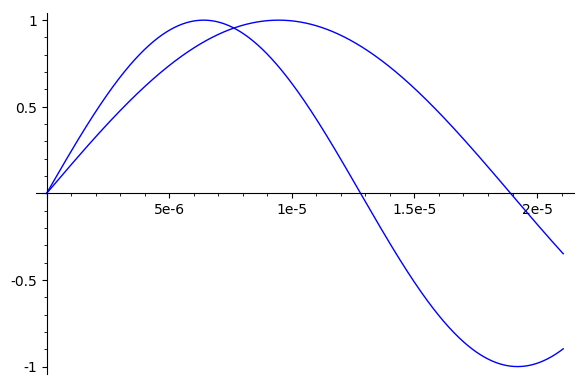

In [154]:
p = sage.plot.graphics.Graphics()
for i in range(n_layers):
    p += plot ( sin(k_values_d[i].rhs()* x), 0*lambda_d/32, lambda_d/3)

p.show()

In [155]:
disp_eq_brakes

[1.2803889789309366e-05,
 (4.07560470154422e-6)*pi + 1.2803889789309366e-05,
 (8.15120940308844e-6)*pi + 1.2803889789309366e-05,
 1.892215568863932e-05,
 (6.02310922360187e-6)*pi + 1.892215568863932e-05,
 0.0000120462184472037*pi + 1.892215568863932e-05]

In [156]:
disp_eq_brakes.sort()

In [157]:
for i in range(len(disp_eq_brakes)):
    display(Math(latex(disp_eq_brakes [i].n())))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [158]:
disp_eq_s.lhs ().subs(h  == disp_eq_brakes [0] + lambda_d/64)

0.0000857414620708909

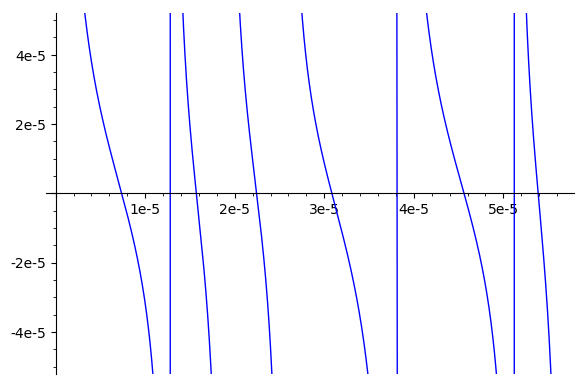

In [159]:
p = sage.plot.graphics.Graphics()
ylim = 5*10^-5
xeps = lambda_d/1024
p += plot(disp_eq_s.lhs(), xeps, disp_eq_brakes[0])
for i in range(len(disp_eq_brakes)-1):
    p += plot (disp_eq_s.lhs(), disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps, ymin = -ylim, ymax = ylim)

p.show()

In [160]:
h_lst = []

xeps = lambda_d/1024
for i in range(len(disp_eq_brakes)-1):
    try:
        
        h_lst += [find_root (disp_eq_s.lhs(), disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps)]
    except  Exception as ex:
        print(str(ex))
        print(disp_eq_brakes[i].n())
        print(disp_eq_brakes [i+1].n())

In [161]:
h_lst 

[1.5720024693785078e-05,
 2.2448399672557188e-05,
 3.084688315441931e-05,
 3.812811446043326e-05,
 4.560398282749686e-05]

In [162]:
def find_newton_root(f,x,a,b):
    df = f.diff(x)
    NewtonIt(x)=x-(f/df)(x)
    
    xn=(a+b)/2;                      # initial guess

    print (xn)
    for i in range(10):
        xn=N(NewtonIt(xn),digits=20)

        
        print (xn)

    return xn

In [163]:
h_lst_ =[]

xeps = lambda_d/1024
for i in range(len(disp_eq_brakes)-1):
    try:
        h_lst_ += [find_newton_root (disp_eq_s.lhs(),h,disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps)]
    except  Exception as ex:
        print(str(ex))
        print(disp_eq_brakes[i].n())
        print(disp_eq_brakes [i+1].n())



1.5863022738974343e-05
0.000015719810697436580244
0.000015720024741203350707
0.000015720024742913130757
0.000015720024742913130757
0.000015720024742913130757
0.000015720024742913130757
0.000015720024742913130757
0.000015720024742913130757
0.000015720024742913130757
0.000015720024742913130757
(2.03780235077211e-6)*pi + 1.5863022738974343e-05
0.000022448742212172960312
0.000022448399657387861471
0.000022448399652882903188
0.000022448399652882903188
0.000022448399652882903188
0.000022448399652882903188
0.000022448399652882903188
0.000022448399652882903188
0.000022448399652882903188
0.000022448399652882903188
(5.04935696257304e-6)*pi + 1.5863022738974343e-05
0.000030856041776493867280
0.000030846881178375183425
0.000030846883153945281561
0.000030846883153945376429
0.000030846883153945376429
0.000030846883153945376429
0.000030846883153945376429
0.000030846883153945376429
0.000030846883153945376429
0.000030846883153945376429
(7.08715931334515e-6)*pi + 1.5863022738974343e-05
0.000038128114464

/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:6: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.


In [164]:
h_lst

[1.5720024693785078e-05,
 2.2448399672557188e-05,
 3.084688315441931e-05,
 3.812811446043326e-05,
 4.560398282749686e-05]

In [165]:
h_sol = h_lst[0]

In [166]:
h_sol

1.5720024693785078e-05

In [167]:
a0 = var("a0")

In [168]:
E_rho_sol = []
for i in range(n_layers):
    E_rho_sol += [lambda rh,ph,z, a0, i=i: E_rho_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(A_z[0] == a0)
                  .subs(psi_m == pi/2)
                 ]

In [169]:
E_phi_sol = []
for i in range(n_layers):
    E_phi_sol += [lambda rh,ph,z, a0, i=i: E_phi_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(A_z[0] == a0)
                  .subs(psi_m == pi/2)
                 ]

In [170]:
E_z_sol = []
for i in range(n_layers):
    E_z_sol += [lambda rh,ph,z, a0, i=i: E_z_s[i](rh,ph,z)
                .subs(digit_values)
                .subs(h == h_sol)
                .subs(omega_value)
                .subs(kappa == kappa_d1)
                .subs(c_value)
                .subs(k_values_d)
                .subs(digit_values)
                .subs(A_z[0] == a0)
                .subs(psi_m == pi/2)
               ]

In [171]:
H_rho_sol = []
for i in range(n_layers):
    H_rho_sol += [lambda rh,ph,z, a0, i=i: H_rho_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(A_z[0] == a0)
                  .subs(psi_m == pi/2)
                 ]

In [172]:
H_phi_sol = []
for i in range(n_layers):
    H_phi_sol += [lambda rh,ph,z, a0, i=i: H_phi_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(A_z[0] == a0)
                  .subs(psi_m == pi/2)
                 ]

In [173]:
[E_rho_sol [1](rho,ph,z,a0) for rho in [0..12]]

[792167.815520114*a0*(bessel_J(1, 0.20040212980798106*rho) - bessel_J(-1, 0.20040212980798106*rho))*(0.873955127673042*cos(166027.206692757*z) + 0.486006620133920*sin(166027.206692757*z)),
 792167.815520114*a0*(bessel_J(1, 0.20040212980798106*rho) - bessel_J(-1, 0.20040212980798106*rho))*(0.873955127673042*cos(166027.206692757*z) + 0.486006620133920*sin(166027.206692757*z)),
 792167.815520114*a0*(bessel_J(1, 0.20040212980798106*rho) - bessel_J(-1, 0.20040212980798106*rho))*(0.873955127673042*cos(166027.206692757*z) + 0.486006620133920*sin(166027.206692757*z)),
 792167.815520114*a0*(bessel_J(1, 0.20040212980798106*rho) - bessel_J(-1, 0.20040212980798106*rho))*(0.873955127673042*cos(166027.206692757*z) + 0.486006620133920*sin(166027.206692757*z)),
 792167.815520114*a0*(bessel_J(1, 0.20040212980798106*rho) - bessel_J(-1, 0.20040212980798106*rho))*(0.873955127673042*cos(166027.206692757*z) + 0.486006620133920*sin(166027.206692757*z)),
 792167.815520114*a0*(bessel_J(1, 0.20040212980798106*r

In [174]:
[E_phi_sol [1](rho,ph,z,a0) for rho in [0..12]]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [175]:
[E_z_sol [1](rho,ph,z, a0) for rho in [0..12]]

[1.91236268510313*a0*(0.486006620133920*cos(166027.206692757*z) - 0.873955127673042*sin(166027.206692757*z))*bessel_J(0, 0.20040212980798106*rho),
 1.91236268510313*a0*(0.486006620133920*cos(166027.206692757*z) - 0.873955127673042*sin(166027.206692757*z))*bessel_J(0, 0.20040212980798106*rho),
 1.91236268510313*a0*(0.486006620133920*cos(166027.206692757*z) - 0.873955127673042*sin(166027.206692757*z))*bessel_J(0, 0.20040212980798106*rho),
 1.91236268510313*a0*(0.486006620133920*cos(166027.206692757*z) - 0.873955127673042*sin(166027.206692757*z))*bessel_J(0, 0.20040212980798106*rho),
 1.91236268510313*a0*(0.486006620133920*cos(166027.206692757*z) - 0.873955127673042*sin(166027.206692757*z))*bessel_J(0, 0.20040212980798106*rho),
 1.91236268510313*a0*(0.486006620133920*cos(166027.206692757*z) - 0.873955127673042*sin(166027.206692757*z))*bessel_J(0, 0.20040212980798106*rho),
 1.91236268510313*a0*(0.486006620133920*cos(166027.206692757*z) - 0.873955127673042*sin(166027.206692757*z))*bessel_J(

In [176]:
[H_rho_sol [1](rho,ph,z, a0) for rho in [0..12]]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [177]:
[H_phi_sol [1](rho,ph,z, a0) for rho in [0..12]]

[-4156076.544715626*I*a0*(bessel_J(1, 0.20040212980798106*rho) - bessel_J(-1, 0.20040212980798106*rho))*(0.486006620133920*cos(166027.206692757*z) - 0.873955127673042*sin(166027.206692757*z))/pi,
 -4156076.544715626*I*a0*(bessel_J(1, 0.20040212980798106*rho) - bessel_J(-1, 0.20040212980798106*rho))*(0.486006620133920*cos(166027.206692757*z) - 0.873955127673042*sin(166027.206692757*z))/pi,
 -4156076.544715626*I*a0*(bessel_J(1, 0.20040212980798106*rho) - bessel_J(-1, 0.20040212980798106*rho))*(0.486006620133920*cos(166027.206692757*z) - 0.873955127673042*sin(166027.206692757*z))/pi,
 -4156076.544715626*I*a0*(bessel_J(1, 0.20040212980798106*rho) - bessel_J(-1, 0.20040212980798106*rho))*(0.486006620133920*cos(166027.206692757*z) - 0.873955127673042*sin(166027.206692757*z))/pi,
 -4156076.544715626*I*a0*(bessel_J(1, 0.20040212980798106*rho) - bessel_J(-1, 0.20040212980798106*rho))*(0.486006620133920*cos(166027.206692757*z) - 0.873955127673042*sin(166027.206692757*z))/pi,
 -4156076.544715626*

In [178]:
digit_values

[m == 0,
 a == 12,
 mu_0 == 1,
 epsilon_0 == 6.09102400000000,
 mu_1 == 1,
 epsilon_1 == 2.78890000000000]

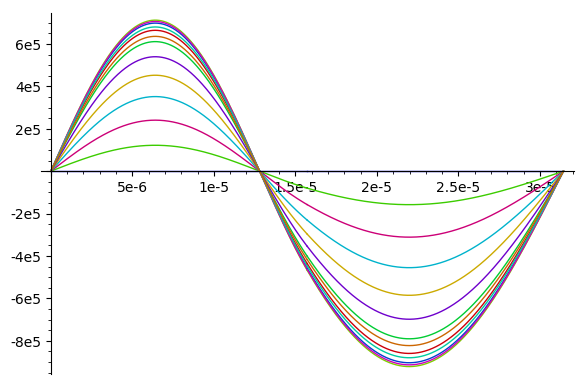

In [179]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers):
    p += plot ([E_rho_sol[i](rh,ph,z,1).subs(rh == rho) for rho in [0..12]],(z, i*h_sol, (i+1)*h_sol))
p.show ()

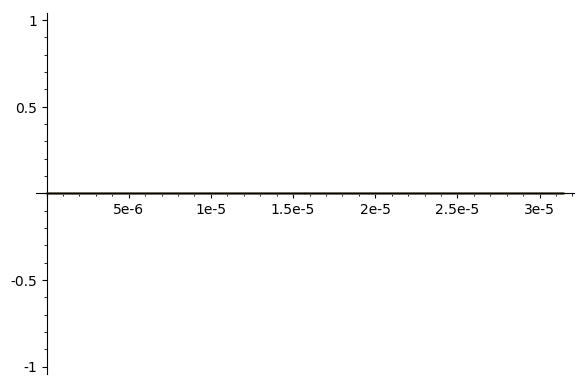

In [180]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers):
    p += plot ([E_phi_sol[i](rh,ph,z,1).subs(rh == rho) for rho in [0..12]],(z, i*h_sol, (i+1)*h_sol))
p.show ()

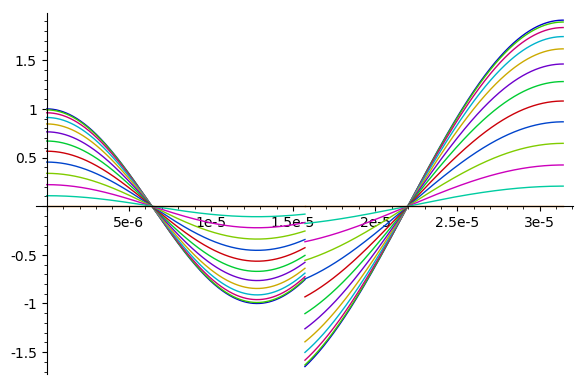

In [181]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers):
    p += plot ([E_z_sol[i](rh,ph,z,1).subs(rh == rho) for rho in [0..12]],(z, i*h_sol, (i+1)*h_sol))
p.show ()

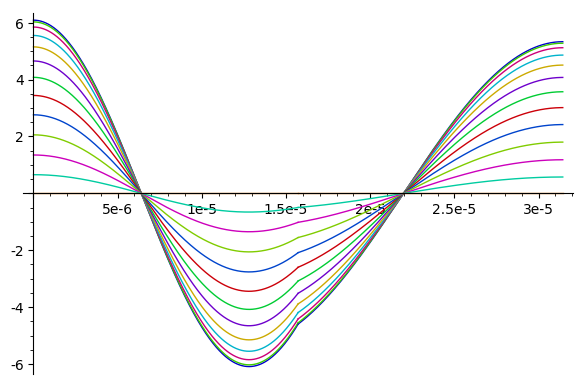

In [182]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers):
    p += plot ([epsilon_d[i]*E_z_sol[i](rh,ph,z,1).subs(rh == rho) for rho in [0..12]],(z, i*h_sol, (i+1)*h_sol))
p.show ()

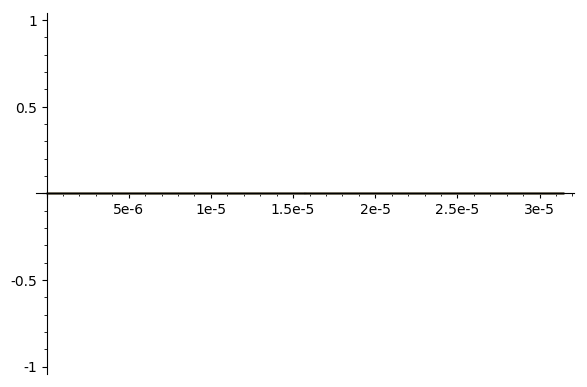

In [183]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers):
    p += plot ([H_rho_sol[i](rh,ph,z,1).subs(rh == rho).imag_part() for rho in [0..12]],(z, i*h_sol, (i+1)*h_sol))
p.show ()

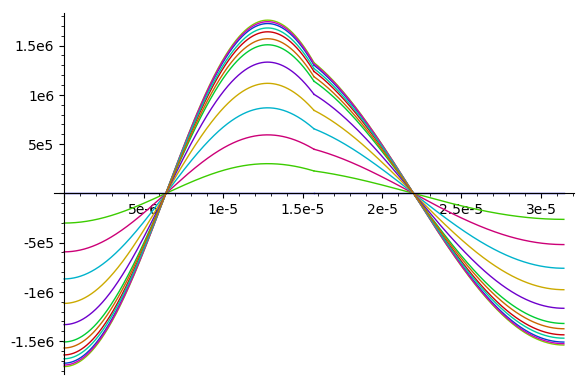

In [184]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers):
    p += plot ([H_phi_sol[i](rh,ph,z,1).subs(rh == rho).imag_part() for rho in [0..12]],(z, i*h_sol, (i+1)*h_sol))
p.show ()

In [185]:
def get_integrand_view(f):
    return f(x)

class my_dummy_integral:
    f = None
    a = None
    b = None
    def __init__(self, f, a, b):
        print ("my_dummy_integral ", f, a, b)
        self.f = f
        self.a = a
        self.b = b

def num_int(f, a, b):
    from scipy import integrate

    to_call_integration = True

    if type(f) is my_dummy_integral:
        to_call_integration = False

    import inspect
    stack = inspect.stack()
    for frame in stack:
        func_name = frame[3]
        # print ("func_name = ", func_name)
        if ('get_integrand_view' == func_name):
            to_call_integration = False
            break;

    if not to_call_integration:
        return my_dummy_integral(f,a,b)

    try:
        integral = integrate.quad(f, a, b)

        result = integral[0]
        return result

    except Exception as ex:

        print ("Exception ex = ", str(ex))
        print ("f = ", f)
        try:
            print ("integrand = ", get_integrand_view(f))
        except Exception as ex2:
            print ("Exception ex2 = ", ex2)
        print ("a = ", a)
        print ("b = ", b)

        raise ex

In [186]:
ED_8pi_rho_s = []
for i in range(n_layers):
    exec(preparse("ED_8pi_rho_s += [lambda rh,ph,z, i=i:" + str(
        ( epsilon[i] * E_rho_s[i](rh, ph, z) * E_rho_s[i](rh, ph, z) ) / (8*pi)
    ) + "]"))

In [187]:
ED_8pi_phi_s = []
for i in range(n_layers):
    exec(preparse("ED_8pi_phi_s += [lambda rh,ph,z,  i=i:" + str(
        ( epsilon[i] * E_phi_s[i](rh, ph, z) * E_phi_s[i](rh, ph, z) ) / (8*pi)
    ) + "]"))

In [188]:
ED_8pi_z_s = []
for i in range(n_layers):
    exec(preparse("ED_8pi_z_s += [lambda rh,ph,z,  i=i:" + str(
        ( epsilon[i] * E_z_s[i](rh, ph, z) * E_z_s[i](rh, ph, z) ) / (8*pi)
    ) + "]"))

In [189]:
ED_8pi_rho_s[0](rh,ph,z)

1/32*A_z_0^2*epsilon_0*k_0^2*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))^2*sin(m*varphi + psi_m)^2*sin(k_0*z)^2/(pi*kappa^2)

In [190]:
ED_8pi_phi_s[0](rh,ph,z)

1/8*A_z_0^2*epsilon_0*k_0^2*m^2*bessel_J(m, kappa*rho)^2*cos(m*varphi + psi_m)^2*sin(k_0*z)^2/(pi*kappa^4*rho^2)

In [191]:
ED_8pi_z_s[0](rh,ph,z)

1/8*A_z_0^2*epsilon_0*bessel_J(m, kappa*rho)^2*cos(k_0*z)^2*sin(m*varphi + psi_m)^2/pi

In [192]:
ED_8pi_rho_sol = []
for i in range(n_layers):
    ED_8pi_rho_sol += [lambda rh,ph,z, a0, i=i: ED_8pi_rho_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(A_z[0] == a0)
                  .subs(psi_m == pi/2)
                 ]

In [193]:
ED_8pi_phi_sol = []
for i in range(n_layers):
    ED_8pi_phi_sol += [lambda rh,ph,z, a0, i=i: ED_8pi_phi_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(A_z[0] == a0)
                  .subs(psi_m == pi/2)
                 ]

In [194]:
ED_8pi_z_sol = []
for i in range(n_layers):
    ED_8pi_z_sol += [lambda rh,ph,z, a0, i=i: ED_8pi_z_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(A_z[0] == a0)
                  .subs(psi_m == pi/2)
                 ]

In [195]:
ED_8pi_rho_sol[0](rh,ph,z, a0)

2.85332707735229e11*a0^2*(bessel_J(1, 0.20040212980798106*rho) - bessel_J(-1, 0.20040212980798106*rho))^2*sin(245362.362944843*z)^2/pi

In [196]:
ED_8pi_phi_sol[0](rh,ph,z, a0)

0

In [197]:
ED_8pi_z_sol[0](rh,ph,z, a0)

0.761378000000000*a0^2*bessel_J(0, 0.20040212980798106*rho)^2*cos(245362.362944843*z)^2/pi

In [198]:
ED_8pi_rho_sol_rh = []
for i in range(n_layers):
    ED_8pi_rho_sol_rh += [lambda rh,ph,z, a0, i=i: ED_8pi_rho_sol[i](rh,ph,z, a0) * rh]

In [199]:
ED_8pi_phi_sol_rh = []
for i in range(n_layers):
    ED_8pi_phi_sol_rh += [lambda rh,ph,z, a0, i=i: ED_8pi_phi_sol[i](rh,ph,z, a0) * rh]

In [200]:
ED_8pi_z_sol_rh = []
for i in range(n_layers):
    ED_8pi_z_sol_rh += [lambda rh,ph,z, a0, i=i: ED_8pi_z_sol[i](rh,ph,z, a0) * rh]

In [201]:
ED_8pi_rho_sol_rh[0](rh,ph,z,1)

2.85332707735229e11*rho*(bessel_J(1, 0.20040212980798106*rho) - bessel_J(-1, 0.20040212980798106*rho))^2*sin(245362.362944843*z)^2/pi

In [202]:
ED_8pi_phi_sol_rh[0](rh,ph,z,1)

0

In [203]:
ED_8pi_z_sol_rh[0](rh,ph,z,1)

0.761378000000000*rho*bessel_J(0, 0.20040212980798106*rho)^2*cos(245362.362944843*z)^2/pi

In [204]:
ED_8pi_rho_sol_rh_int_ph = []
for i in range(n_layers):
    ED_8pi_rho_sol_rh_int_ph += [lambda rho, z, a0, i=i: 
                                  num_int(
                                      lambda ph : ED_8pi_rho_sol_rh[i](rh,ph,z, a0).subs(rh == rho), 
                                      0, 2*pi)
                                 ]

In [205]:
[ED_8pi_rho_sol_rh_int_ph [0](rho,0, 1) for rho in [0..12]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [206]:
[ED_8pi_rho_sol_rh_int_ph [1](rho,2*h_sol, 1) for rho in [0..12]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [207]:
ED_8pi_phi_sol_rh_int_ph = []
for i in range(n_layers):
    ED_8pi_phi_sol_rh_int_ph += [lambda rho, z, a0, i=i: 
                                  num_int(
                                      lambda ph : ED_8pi_phi_sol_rh[i](rh,ph,z, a0).subs(rh == rho), 
                                      0, 2*pi)
                                 ]

In [208]:
[ED_8pi_phi_sol_rh_int_ph [0](rho,0, 1) for rho in [0..12]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [209]:
[ED_8pi_phi_sol_rh_int_ph [1](rho,2*h_sol, 1) for rho in [0..12]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [210]:
ED_8pi_z_sol_rh_int_ph = []
for i in range(n_layers):
    ED_8pi_z_sol_rh_int_ph += [lambda rho, z, a0, i=i: 
                                  num_int(
                                      lambda ph : ED_8pi_z_sol_rh[i](rh,ph,z, a0).subs(rh == rho), 
                                      0, 2*pi)
                                 ]

In [211]:
[ED_8pi_z_sol_rh_int_ph [0](rho,0, 1) for rho in [0..12]]

[0.0,
 1.492407689392916,
 2.8081498531164204,
 3.7967859304357425,
 4.35628578269165,
 4.447766257108918,
 4.100530852825334,
 3.4066749576581867,
 2.506141884650341,
 1.5645957966601622,
 0.7475849587380818,
 0.1950299607443845,
 6.818964653477392e-32]

In [212]:
[ED_8pi_z_sol_rh_int_ph [1](rho,2*h_sol, 1) for rho in [0..12]]

[0.0,
 2.4990251766550213,
 4.702225291811973,
 6.3576887856884,
 7.294566977257517,
 7.447750326797947,
 6.866307317827892,
 5.704450967638118,
 4.196515275633901,
 2.619903606053429,
 1.2518252531485112,
 0.32657616653028393,
 1.1418303771064428e-31]

In [213]:
ED_8pi_rho_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    ED_8pi_rho_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda rh : ED_8pi_rho_sol_rh_int_ph[i](rh,zz,a0),
                                             rh1, rh2)
                                        ]

In [214]:
ED_8pi_phi_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    ED_8pi_phi_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda rh : ED_8pi_phi_sol_rh_int_ph[i](rh,zz,a0),
                                             rh1, rh2)
                                        ]

In [215]:
ED_8pi_z_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    ED_8pi_z_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda rh : ED_8pi_z_sol_rh_int_ph[i](rh,zz,a0),
                                             rh1, rh2)
                                        ]

In [216]:
ED_8pi_rho_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1)

0.0

In [217]:
ED_8pi_phi_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1)

0.0

In [218]:
ED_8pi_z_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1)

29.54910595084543

In [219]:
ED_8pi_rho_sol_rh_int_ph_int_rh[1](0, a_val, 2*h_sol, 1)

0.0

In [220]:
ED_8pi_phi_sol_rh_int_ph_int_rh[1](0, a_val, 2*h_sol, 1)

0.0

In [221]:
ED_8pi_z_sol_rh_int_ph_int_rh[1](0, a_val, 2*h_sol, 1)

49.479750234232455

In [222]:
ED_8pi_rho_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    ED_8pi_rho_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : ED_8pi_rho_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [223]:
ED_8pi_phi_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    ED_8pi_phi_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : ED_8pi_phi_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [224]:
ED_8pi_z_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    ED_8pi_z_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : ED_8pi_z_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [225]:
ED_8pi_rho_0 = ED_8pi_rho_sol_rh_int_ph_int_rh_int_z [0](0,12, 0, h_sol, 1)

In [226]:
ED_8pi_rho_1 = ED_8pi_rho_sol_rh_int_ph_int_rh_int_z [1](0,12, h_sol, 2*h_sol, 1)

In [227]:
ED_8pi_rho_0 + ED_8pi_rho_1

615094365.7136102

In [228]:
ED_8pi_phi_0 = ED_8pi_phi_sol_rh_int_ph_int_rh_int_z [0](0,12, 0, h_sol, 1)

In [229]:
ED_8pi_phi_1 = ED_8pi_phi_sol_rh_int_ph_int_rh_int_z [1](0,12, h_sol, 2*h_sol, 1)

In [230]:
ED_8pi_phi_0 + ED_8pi_phi_1

0.0

In [231]:
ED_8pi_z_0 = ED_8pi_z_sol_rh_int_ph_int_rh_int_z [0](0,12, 0, h_sol, 1)

In [232]:
ED_8pi_z_1 = ED_8pi_z_sol_rh_int_ph_int_rh_int_z [1](0,12, h_sol, 2*h_sol, 1)

In [233]:
ED_8pi_z_0 + ED_8pi_z_1

0.0005858673173294328

In [234]:
ED_8pi_rho_0_10 = ED_8pi_rho_sol_rh_int_ph_int_rh_int_z [0](0,12, 0, h_sol, 10)

In [235]:
ED_8pi_rho_1_10 = ED_8pi_rho_sol_rh_int_ph_int_rh_int_z [1](0,12, h_sol, 2*h_sol, 10)

In [236]:
ED_8pi_rho_0_10 + ED_8pi_rho_1_10

61509436571.36103

In [237]:
ED_8pi_phi_0_10 = ED_8pi_phi_sol_rh_int_ph_int_rh_int_z [0](0,12, 0, h_sol, 10)

In [238]:
ED_8pi_phi_1_10 = ED_8pi_phi_sol_rh_int_ph_int_rh_int_z [1](0,12, h_sol, 2*h_sol, 10)

In [239]:
ED_8pi_phi_0_10 + ED_8pi_phi_1_10

0.0

In [240]:
ED_8pi_z_0_10 = ED_8pi_z_sol_rh_int_ph_int_rh_int_z [0](0,12, 0, h_sol, 10)

In [241]:
ED_8pi_z_1_10 = ED_8pi_z_sol_rh_int_ph_int_rh_int_z [1](0,12, h_sol, 2*h_sol, 10)

In [242]:
ED_8pi_z_0_10 + ED_8pi_z_1_10

0.05858673173294329

In [243]:
H2_8pi_rho_s = []
for i in range(n_layers):
    exec(preparse("H2_8pi_rho_s += [lambda rh,ph,z, i=i:" + str(
        (  H_rho_s[i](rh, ph, z) * H_rho_s[i](rh, ph, z) ) / (8*pi)
    ) + "]"))

In [244]:
H2_8pi_phi_s = []
for i in range(n_layers):
    exec(preparse("H2_8pi_phi_s += [lambda rh,ph,z,  i=i:" + str(
        (  H_phi_s[i](rh, ph, z) * H_phi_s[i](rh, ph, z) ) / (8*pi)
    ) + "]"))

In [245]:
H2_8pi_rho_s[0](rh,ph,z)

-1/8*(k_0^2 + kappa^2)^2*A_z_0^2*c^2*m^2*bessel_J(m, kappa*rho)^2*cos(m*varphi + psi_m)^2*cos(k_0*z)^2/(pi*kappa^4*mu_0^2*omega^2*rho^2)

In [246]:
H2_8pi_phi_s[0](rh,ph,z)

-1/32*(k_0^2 + kappa^2)^2*A_z_0^2*c^2*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))^2*cos(k_0*z)^2*sin(m*varphi + psi_m)^2/(pi*kappa^2*mu_0^2*omega^2)

In [247]:
H2_8pi_rho_sol = []
for i in range(n_layers):
    H2_8pi_rho_sol += [lambda rh,ph,z, a0, i=i: H2_8pi_rho_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(A_z[0] == a0)
                  .subs(psi_m == pi/2)
                 ]

In [248]:
H2_8pi_phi_sol = []
for i in range(n_layers):
    H2_8pi_phi_sol += [lambda rh,ph,z, a0, i=i: H2_8pi_phi_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(A_z[0] == a0)
                  .subs(psi_m == pi/2)
                 ]

In [249]:
H2_8pi_rho_sol[0](rh,ph,z, a0)

0

In [250]:
H2_8pi_phi_sol[0](rh,ph,z, a0)

-2.81612094804024e12*a0^2*(bessel_J(1, 0.20040212980798106*rho) - bessel_J(-1, 0.20040212980798106*rho))^2*cos(245362.362944843*z)^2/pi^3

In [251]:
H2_8pi_rho_sol_rh = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh += [lambda rh,ph,z, a0, i=i: H2_8pi_rho_sol[i](rh,ph,z, a0) * rh]

In [252]:
H2_8pi_phi_sol_rh = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh += [lambda rh,ph,z, a0, i=i: H2_8pi_phi_sol[i](rh,ph,z, a0) * rh]

In [253]:
H2_8pi_phi_sol_rh[0](rh,ph,z,1)

-2.81612094804024e12*rho*(bessel_J(1, 0.20040212980798106*rho) - bessel_J(-1, 0.20040212980798106*rho))^2*cos(245362.362944843*z)^2/pi^3

In [254]:
H2_8pi_rho_sol_rh_int_ph = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh_int_ph += [lambda rho, z, a0, i=i: 
                                  num_int(
                                      lambda ph : H2_8pi_rho_sol_rh[i](rh,ph,z, a0).subs(rh == rho), 
                                      0, 2*pi)
                                 ]

In [255]:
[H2_8pi_rho_sol_rh_int_ph [0](rho,0, 1) for rho in [0..12]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [256]:
[H2_8pi_rho_sol_rh_int_ph [1](rho,2*h_sol, 1) for rho in [0..12]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [257]:
H2_8pi_phi_sol_rh_int_ph = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh_int_ph += [lambda rho, z, a0, i=i: 
                                  num_int(
                                      lambda ph : H2_8pi_phi_sol_rh[i](rh,ph,z, a0).subs(rh == rho), 
                                      0, 2*pi)
                                 ]

In [258]:
[H2_8pi_phi_sol_rh_int_ph [0](rho,0, 1) for rho in [0..12]]

[0.0,
 -22689354355.828716,
 -176106640521.59937,
 -564944906033.8008,
 -1246348683090.323,
 -2216689748271.523,
 -3409017345342.345,
 -4701781312890.931,
 -5937529282431.79,
 -6948583135770.335,
 -7585485523316.277,
 -7743477411056.566,
 -7382514696699.518]

In [259]:
[H2_8pi_phi_sol_rh_int_ph [1](rho,2*h_sol, 1) for rho in [0..12]]

[0.0,
 -17395940874.364838,
 -135021061333.5397,
 -433143580399.5421,
 -955576243372.1239,
 -1699537289294.2617,
 -2613695535326.025,
 -3604858403660.677,
 -4552307073932.195,
 -5327482637663.376,
 -5815796060017.096,
 -5936928530102.2705,
 -5660178211942.938]

In [260]:
H2_8pi_rho_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda rh : H2_8pi_rho_sol_rh_int_ph[i](rh,zz,a0),
                                             rh1, rh2)
                                        ]

In [261]:
H2_8pi_phi_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda rh : H2_8pi_phi_sol_rh_int_ph[i](rh,zz,a0),
                                             rh1, rh2)
                                        ]

In [262]:
H2_8pi_rho_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1)

0.0

In [263]:
H2_8pi_phi_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1)

-44295088180197.11

In [264]:
H2_8pi_rho_sol_rh_int_ph_int_rh[1](0, a_val, 2*h_sol, 1)

0.0

In [265]:
H2_8pi_phi_sol_rh_int_ph_int_rh[1](0, a_val, 2*h_sol, 1)

-33961069271657.625

In [266]:
surf_f_z = H2_8pi_rho_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1)       + H2_8pi_phi_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1) \
          -H2_8pi_rho_sol_rh_int_ph_int_rh[1](0, a_val, 2*h_sol, 1) - H2_8pi_phi_sol_rh_int_ph_int_rh[1](0, a_val, 2*h_sol, 1)

In [267]:
surf_f_z

-10334018908539.484

In [268]:
surf_f_z_10 = H2_8pi_rho_sol_rh_int_ph_int_rh[0](0, a_val, 0, 10)       + H2_8pi_phi_sol_rh_int_ph_int_rh[0](0, a_val, 0, 10) \
            - H2_8pi_rho_sol_rh_int_ph_int_rh[1](0, a_val, 2*h_sol, 10) - H2_8pi_phi_sol_rh_int_ph_int_rh[1](0, a_val, 2*h_sol, 10)

In [269]:
surf_f_z_10

-1033401890853948.5

In [270]:
H2_8pi_rho_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : H2_8pi_rho_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [271]:
H2_8pi_phi_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : H2_8pi_phi_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [272]:
H2_8pi_rho_0 = H2_8pi_rho_sol_rh_int_ph_int_rh_int_z [0](0,a_val, 0, h_sol, 1)

In [273]:
H2_8pi_rho_1 = H2_8pi_rho_sol_rh_int_ph_int_rh_int_z [1](0,a_val, h_sol, 2*h_sol, 1)

In [274]:
H2_8pi_rho_0 + H2_8pi_rho_1

0.0

In [275]:
H2_8pi_phi_0 = H2_8pi_phi_sol_rh_int_ph_int_rh_int_z [0](0,a_val, 0, h_sol, 1)

In [276]:
H2_8pi_phi_1 = H2_8pi_phi_sol_rh_int_ph_int_rh_int_z [1](0,a_val, h_sol, 2*h_sol, 1)

In [277]:
H2_8pi_phi_0 + H2_8pi_phi_1

-615094361.8696232

In [278]:
H2_8pi_phi_0_10 = H2_8pi_phi_sol_rh_int_ph_int_rh_int_z [0](0,a_val, 0, h_sol, 10)

In [279]:
H2_8pi_phi_1_10 = H2_8pi_phi_sol_rh_int_ph_int_rh_int_z [1](0,a_val, h_sol, 2*h_sol, 10)

In [280]:
H2_8pi_phi_0_10 + H2_8pi_phi_1_10

-61509436186.96231

In [281]:
-H2_8pi_phi_0 - H2_8pi_phi_1

615094361.8696232

In [282]:
ED_8pi_rho_0 + ED_8pi_rho_1

615094365.7136102

In [283]:
ED_8pi_z_0 + ED_8pi_z_1

0.0005858673173294328

In [284]:
ED_8pi_rho_0 + ED_8pi_rho_1 + ED_8pi_z_0 + ED_8pi_z_1

615094365.714196

In [285]:
field_energy = -H2_8pi_phi_0 - H2_8pi_phi_1 + ED_8pi_rho_0 + ED_8pi_rho_1 + ED_8pi_z_0 + ED_8pi_z_1
field_energy

1230188727.5838192

In [286]:
# E x H = (-E_z(rh, ph, z)*H_phi(rh, ph, z) + E_phi(rh, ph, z)*H_z(rh, ph, z)) e_rh 
#       + ( E_z(rh, ph, z)*H_rho(rh, ph, z) - E_rho(rh, ph, z)*H_z(rh, ph, z)) e_ph
#       + (E_rho(rh, ph, z)*H_phi(rh, ph, z) - E_phi(rh, ph, z)*H_rho(rh, ph, z)) e_z

In [287]:
# Abraham force
# (epsilon * mu - 1) / (4 * pi * c) * ([E x H]).diff(t)
# (epsilon * mu - 1) / (4 * pi * c) * ([E.diff(t) x H] + [E x H.diff(t)])
# ([E x H])_z = E_rh * H_ph - E_ph * H_rh
# ([E.diff(t) x H])_z = E_rh.diff(t) * H_ph - E_ph.diff(t) * H_rh
# ([E x H.diff(t)])_z = E_rh * H_ph.diff(t) - E_ph * H_rh.diff(t)
# f_z = (epsilon * mu - 1) / (4 * pi * c) * (
#                      (E_rh.diff(t) * H_ph - E_ph.diff(t) * H_rh) +
#                      (E_rh * H_ph.diff(t) - E_ph * H_rh.diff(t)) )
# E_rh.diff(t) = -I * omega * E_rh
# E_ph.diff(t) = -I * omega * E_ph
# H_ph.diff(t) = -I * omega * H_ph
# H_rh.diff(t) = -I * omega * H_rh
# f_z = (epsilon * mu - 1) / (4 * pi * c) * (
#                      -I * omega * (E_rh * H_ph - E_ph * H_rh) +
#                      -I * omega * (E_rh * H_ph - E_ph * H_rh) )
# f_z = -I * omega * (epsilon * mu - 1) / (2 * pi * c) * (E_rh * H_ph - E_ph * H_rh)

In [288]:
Abraham_f_z = []
for i in range(n_layers):
    exec(preparse("Abraham_f_z += [lambda rh,ph,z,  i=i: " + str(
        -I * omega / (2 * pi * c) * (epsilon[i] * mu[i] - 1) 
        * (  E_rho[i](rh, ph, z) * H_phi[i](rh, ph, z) 
           - E_phi[i](rh, ph, z) * H_rho[i](rh, ph, z))
    ) + "]"))

In [289]:
display(Math(latex(Abraham_f_z[0](rh, ph, z))))

<IPython.core.display.Math object>

In [290]:
display(Math(latex(Abraham_f_z[1](rh, ph, z))))

<IPython.core.display.Math object>

In [291]:
Abraham_f_z_s = []
for i in range(n_layers):
    exec(preparse("Abraham_f_z_s += [lambda rh,ph,z,  i=i:" + str(
        -I * omega / (2 * pi.n() * c) * (epsilon[i] * mu[i] - 1)
        * (  E_rho_s[i](rh, ph, z) * H_phi_s[i](rh, ph, z) 
           - E_phi_s[i](rh, ph, z) * H_rho_s[i](rh, ph, z))
    ) + "]"))

In [292]:
display(Math(latex(Abraham_f_z_s[0](rh, ph, z))))

<IPython.core.display.Math object>

In [293]:
display(Math(latex(Abraham_f_z_s[1](rh, ph, z))))

<IPython.core.display.Math object>

In [294]:
Abraham_f_z_sol = []
for i in range(n_layers):
    Abraham_f_z_sol += [lambda rh,ph,z, a0, i=i: Abraham_f_z_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(A_z[0] == a0)
                  .subs(psi_m == pi/2)
                 ]

In [295]:
[Abraham_f_z_sol [0](rho,ph,z,a0) for rho in [0..int(a_val)]]

[-7.45048346975730e16*a0^2*(bessel_J(1, 0.20040212980798106*rho) - bessel_J(-1, 0.20040212980798106*rho))^2*cos(245362.362944843*z)*sin(245362.362944843*z),
 -7.45048346975730e16*a0^2*(bessel_J(1, 0.20040212980798106*rho) - bessel_J(-1, 0.20040212980798106*rho))^2*cos(245362.362944843*z)*sin(245362.362944843*z),
 -7.45048346975730e16*a0^2*(bessel_J(1, 0.20040212980798106*rho) - bessel_J(-1, 0.20040212980798106*rho))^2*cos(245362.362944843*z)*sin(245362.362944843*z),
 -7.45048346975730e16*a0^2*(bessel_J(1, 0.20040212980798106*rho) - bessel_J(-1, 0.20040212980798106*rho))^2*cos(245362.362944843*z)*sin(245362.362944843*z),
 -7.45048346975730e16*a0^2*(bessel_J(1, 0.20040212980798106*rho) - bessel_J(-1, 0.20040212980798106*rho))^2*cos(245362.362944843*z)*sin(245362.362944843*z),
 -7.45048346975730e16*a0^2*(bessel_J(1, 0.20040212980798106*rho) - bessel_J(-1, 0.20040212980798106*rho))^2*cos(245362.362944843*z)*sin(245362.362944843*z),
 -7.45048346975730e16*a0^2*(bessel_J(1, 0.2004021298079810

In [296]:
[Abraham_f_z_sol [1](rho,ph,z,a0) for rho in [0..int(a_val)]]

[-2.96633259831549e16*a0^2*(bessel_J(1, 0.20040212980798106*rho) - bessel_J(-1, 0.20040212980798106*rho))^2*(0.873955127673042*cos(166027.206692757*z) + 0.486006620133920*sin(166027.206692757*z))*(0.486006620133920*cos(166027.206692757*z) - 0.873955127673042*sin(166027.206692757*z)),
 -2.96633259831549e16*a0^2*(bessel_J(1, 0.20040212980798106*rho) - bessel_J(-1, 0.20040212980798106*rho))^2*(0.873955127673042*cos(166027.206692757*z) + 0.486006620133920*sin(166027.206692757*z))*(0.486006620133920*cos(166027.206692757*z) - 0.873955127673042*sin(166027.206692757*z)),
 -2.96633259831549e16*a0^2*(bessel_J(1, 0.20040212980798106*rho) - bessel_J(-1, 0.20040212980798106*rho))^2*(0.873955127673042*cos(166027.206692757*z) + 0.486006620133920*sin(166027.206692757*z))*(0.486006620133920*cos(166027.206692757*z) - 0.873955127673042*sin(166027.206692757*z)),
 -2.96633259831549e16*a0^2*(bessel_J(1, 0.20040212980798106*rho) - bessel_J(-1, 0.20040212980798106*rho))^2*(0.873955127673042*cos(166027.2066927

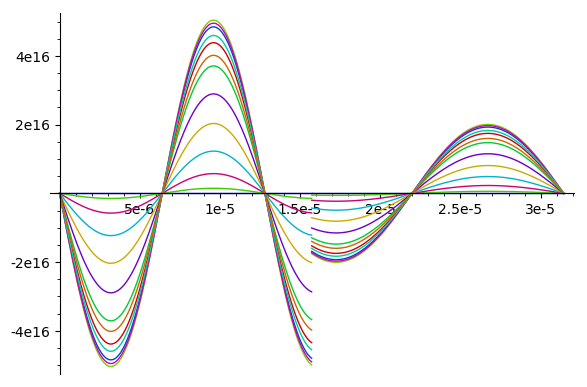

In [297]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers):
    p += plot ([Abraham_f_z_sol[i](rh,ph,z,1).subs(rh == rho) for rho in [0..int(a_val)]],(z, i*h_sol, (i+1)*h_sol))
p.show ()

In [298]:
Abraham_f_z_sol_rh = []
for i in range(n_layers):
    Abraham_f_z_sol_rh += [lambda rh,ph,z, a0, i=i: Abraham_f_z_sol[i](rh,ph,z, a0) * rh]

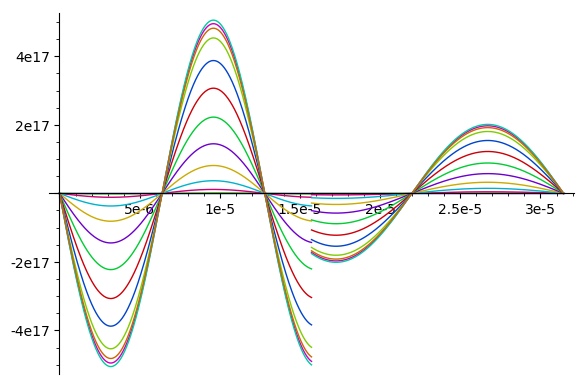

In [299]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers):
    p += plot ([Abraham_f_z_sol_rh[i](rh,ph,z, 1).subs(rh == rho) for rho in [0..12]],(z, i*h_sol, (i+1)*h_sol))
p.show ()

In [300]:
Abraham_f_z_sol_rh_int_ph = []
for i in range(n_layers):
    Abraham_f_z_sol_rh_int_ph += [lambda rho, z, a0, i=i: 
                                  num_int(
                                      lambda ph : Abraham_f_z_sol_rh[i](rh,ph,z,a0).subs(rh == rho), 
                                      0, 2*pi)
                                 ]

In [301]:
[Abraham_f_z_sol_rh_int_ph [0](rho,h_sol/2, 1) for rho in [0..12]]

[0.0,
 6104923631015579.0,
 4.738423026228109e+16,
 1.5200721241244227e+17,
 3.3534949512252685e+17,
 5.964348484590682e+17,
 9.172491303074958e+17,
 1.2650873795164413e+18,
 1.5975845878070548e+18,
 1.869624349920876e+18,
 2.0409928417431485e+18,
 2.083503016067552e+18,
 1.9863803844476813e+18]

In [302]:
Abraham_f_z_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    Abraham_f_z_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda rh : Abraham_f_z_sol_rh_int_ph[i](rh,zz,a0),
                                             rh1, rh2)
                                        ]

In [303]:
Abraham_f_z_sol_rh_int_ph_int_rh [0](0,12,h_sol/2, 1)

1.1918282306686087e+19

In [304]:
[Abraham_f_z_sol_rh_int_ph_int_rh [0](0,12, z, 1) for z in [
    0,        1*h_sol/10, 2*h_sol/10, 3*h_sol/10, 4*h_sol/10, 5*h_sol/10, 
              6*h_sol/10, 7*h_sol/10, 8*h_sol/10, 9*h_sol/10, h_sol
]]

[0.0,
 -1.2665935284376592e+19,
 -1.8160952484249686e+19,
 -1.3374004738213538e+19,
 -1.0152598618234775e+18,
 1.1918282306686087e+19,
 1.810419595741422e+19,
 1.40402778127317e+19,
 2.027346838103506e+18,
 -1.1133382366857509e+19,
 -1.799086027898511e+19]

In [305]:
[Abraham_f_z_sol_rh_int_ph_int_rh [1](0,12, z, 1) for z in [
    h_sol,    11*h_sol/10, 12*h_sol/10, 13*h_sol/10, 14*h_sol/10, 15*h_sol/10, 
              16*h_sol/10, 17*h_sol/10, 18*h_sol/10, 19*h_sol/10, 2*h_sol
]]

[-6.321685251799926e+18,
 -7.232663000804209e+18,
 -6.217271474268266e+18,
 -3.545953113537033e+18,
 6.980509316301413e+16,
 3.6669712008353014e+18,
 6.287465140207395e+18,
 7.23333665271141e+18,
 6.252659467194663e+18,
 3.606630102725261e+18,
 0.0]

In [306]:
Abraham_f_z_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    Abraham_f_z_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : Abraham_f_z_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [307]:
Abraham_f_z_0 = Abraham_f_z_sol_rh_int_ph_int_rh_int_z [0](0,12, 0, h_sol, 1)

In [308]:
Abraham_f_z_1 = Abraham_f_z_sol_rh_int_ph_int_rh_int_z [1](0,12, h_sol, 2*h_sol, 1)

In [309]:
Abraham_f_z_0

-31864788906907.75

In [310]:
Abraham_f_z_1

11196750551401.97

In [311]:
Abraham_f_z_0 + Abraham_f_z_1

-20668038355505.78

In [312]:
Abraham_f_z_0_10 = Abraham_f_z_sol_rh_int_ph_int_rh_int_z [0](0,12, 0, h_sol, 10)

In [313]:
Abraham_f_z_1_10 = Abraham_f_z_sol_rh_int_ph_int_rh_int_z [1](0,12, h_sol, 2*h_sol, 10)

In [314]:
Abraham_f_z_0_10

-3186478890690775.5

In [315]:
Abraham_f_z_1_10

1119675055140198.1

In [316]:
Abraham_f_z_0_10 + Abraham_f_z_1_10

-2066803835550577.5

In [317]:
Abraham_f_z_0 + Abraham_f_z_1

-20668038355505.78

In [318]:
sum_f_z = surf_f_z + Abraham_f_z_0 + Abraham_f_z_1

In [319]:
sum_f_z

-31002057264045.266

In [320]:
sum_f_z_10 = surf_f_z_10 + Abraham_f_z_0_10 + Abraham_f_z_1_10

In [321]:
sum_f_z_10

-3100205726404526.0

In [322]:
sum_f_z / (field_energy)

-25201.057828692334

In [323]:
S = pi.n() * a_val^2
S

452.389342116930

In [324]:
V = 2*h_sol * S
V

0.0142231432585667

In [325]:
# мкм
h_sol*10*1000 

0.15720024693785078

In [326]:
field_energy

1230188727.5838192

In [327]:
# эрг / куб см
(field_energy)/V

8.64920436516641e10

In [328]:
# волоконная оптика 1 мВт / 9 мкм
# 10^4 эрг в сек / 0.0009 см
w = (10^4 /(pi.n()*0.00045^2*c)).subs(c_value)
w # эрг в куб см

0.524329625568014

In [329]:
# дин
F_z = sum_f_z / (field_energy) * w
F_z

-13213.6612152361

In [330]:
# Ньютон
F_z / 10^5/2

-0.0660683060761806

In [331]:
# gramm
F_z / 10^5/2 *101

-6.67289891369424

In [332]:
# Толщина серебряного слоя для всех зеркал должна быть не менее 0,15 мкм
# вес одной ячейки
m_of_Layer_gramm = V/2 * 3.95 + V/2 * 4.23 + V * 10.49
m_of_Layer_gramm

0.207373428709902

In [333]:
omega_value[0].rhs().n()

2.98046134067856e15

In [334]:
0.22/10^6

2.20000000000000e-7

In [335]:
# число ячеек в сантиметре
nLayers_per_sm = 1/(3*h_sol)
nLayers_per_sm

21204.37720846055

In [336]:
# вес сантиметрово
m_of_Layer_gramm * nLayers_per_sm / 1000

4.39722440537656

In [337]:
# кг / см толщины
1/(3*h_sol) * F_z / 10^5/2 *101/1000

-141.494665639899